In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [2]:
videoList = ["VID_20150123_172926_F.mp4.txt",
    "VID_20150123_173259_Q.mp4.txt",
    "VID_20150123_173329_F.mp4.txt",
    "VID_20150123_173358_Q.mp4.txt",
    #"VID_20150123_173427_F.mp4.txt",
    "new_VID_20150123_173427_F.mp4.txt",
    "VID_20150123_173457_Q.mp4.txt",
    "VID_20150123_173556_Q.mp4.txt",
    "VID_20150123_173629_F.mp4.txt",
    "VID_20150123_173700_Q.mp4.txt",
    "VID_20150123_173757_Q.mp4.txt",
    "VID_20150123_173028_F.mp4.txt",
    #"VID_20150123_172857_Q.mp4.txt",
    "new_VID_20150123_172857_Q.mp4.txt",
    "VID_20150123_173727_F.mp4.txt",
    "VID_20150123_172827_F.mp4.txt",
    "VID_20150123_172956_Q.mp4.txt",
    "VID_20150123_173057_Q.mp4.txt",
    "VID_20150123_173127_F.mp4.txt",
    "VID_20150123_173157_Q.mp4.txt",
    "VID_20150123_173230_F.mp4.txt",
    "VID_20150123_173527_F.mp4.txt"]
fps = 30.323427803

In [3]:
def readFromFile(fileName):
    l =np.loadtxt(fileName)
    return l[0], l[1], l[2]

In [4]:
#will return a list of the indexes of the peaks
def peakList(colorList, frameThreshold):
    peaks = []
    for i in range(1,len(colorList)-1):
        #check to see if greater than immediate surroundings
        if colorList[i-1] <  colorList[i]  and colorList[i+1] <  colorList[i]:
            #if so, check every other frame in the threshold
            for j in range(2, frameThreshold+1):
                #check everything in threshold before - will break if not a peak
                if i-j>0:
                    if colorList[i]<colorList[i-j]:
                        break
                #check everything in threshold after
                if i+j<len(colorList):
                    if colorList[i]<colorList[i+j]:
                        break
            else:
                peaks.append(i)
    return peaks

In [5]:
def rrList(peakIndexes):
    rrlist = [];
    for i in range(1,len(peakIndexes)):
        rr = (peakIndexes[i]-peakIndexes[i-1])*1/fps
        rrlist.append(rr)
    return rrlist

In [6]:
def timeList(rrList):
    times = [rrList[0]]
    for i in range(1,len(rrList)):
        times.append(times[i-1]+rrList[i])
    return times

In [7]:
thresholds = range(1,31)

In [8]:
def getError(rrList):
    errors = 0
    for rr in rrList:
        #heart beat ranges from 50 to 110 pulses per minute
            if rr<.54 or rr>1.2:
                errors = errors+1
    return errors

In [9]:
#goes through all vids, constructs matrix with vid,colors,errors
allErrors = []
for eachVideo in range(0,len(videoList)):
    allErrors.append([[],[],[]])
    
        
for nameIndex in range(0,len(videoList)):
    #for every vid, get colors
    r,g,b = readFromFile(videoList[nameIndex])
    colors = [r,g,b]
    for c in range(0,len(colors)):
        #list of errors for this paricular color and video
        errors = [0]*len(thresholds)
        for i in range(0,len(thresholds)):
        #for every vid, test each threshold for errors
        #add errors to approprate place on redErrors list
            rr = rrList(peakList(colors[c],i+1))
            if len(rr)>0:
                #relative error
                errors[i] = errors[i]+getError(rr)/(len(rr)*1.0)
            if len(rr)==0:
                #no rr intervals detected, which is obviously wrong, so 100% error
                errors[i] = errors[i]+1
        allErrors[nameIndex][c]=errors
#get average number of errors per video
reds= [0]*30
greens= [0]*30
blues = [0]*30
for a in range(0,len(allErrors)):
    for e in range(0,len(allErrors[a][0])):
            reds[e] = reds[e]+allErrors[a][0][e]
            greens[e] = greens[e]+allErrors[a][1][e]
            blues[e]= blues[e]+allErrors[a][2][e]

for i in range(0,len(reds)):
    reds[i] = reds[i]/12.0
    greens[i] = greens[i]/12.0
    blues[i] = blues[i]/12.0


In [10]:
#total threshold window
for i in range(0,len(thresholds)):
    thresholds[i]= thresholds[i]*2

In the following cells, I will categorize each video by quality. Quality is determined by the the average relative error when a video is analyzed with the a color's optimal frame threshold. For example, a video an average relative error of .2 (when a particular color/ opimal frame threshold is chosen) is of higher quality than a video of error .6. 

I will begin this process by categorizing the videos in a list where list[0]= videos with errors ranging from 0-.2, list[1] = errors from .2-.4, etc.

In [11]:
def getQualityList(interval, videoList):
    #make sure 1/interval is a whole number
    if 1/interval!= int(1/interval):
        return []
    
    qList = []
    i=0
    index=0
    while(i<.9999):
        intervalList = []
        for video in range(0,len(videoList)):
            if allErrors[video][0][6]>=i and allErrors[video][0][6]<i+interval:
                intervalList.append(video)
        qList.append(intervalList)
        i+=interval
    return qList

In [12]:
getQualityList(.2,videoList)

[[0, 1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [7],
 [19],
 [2, 4],
 []]

In [13]:
getQualityList(.1,videoList)

[[0, 1, 3, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18],
 [12],
 [7],
 [],
 [],
 [19],
 [2],
 [4],
 [],
 []]

In [14]:
getQualityList(.05,videoList)

[[0, 1, 3, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18],
 [],
 [],
 [12],
 [7],
 [],
 [],
 [],
 [],
 [],
 [19],
 [],
 [],
 [2],
 [],
 [4],
 [],
 [],
 [],
 []]

In [15]:
getQualityList(.02,videoList)

[[1, 3, 5, 6, 8, 9, 10, 14, 17],
 [0, 11, 13, 15, 16],
 [18],
 [],
 [],
 [],
 [],
 [],
 [],
 [12],
 [7],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [19],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [2],
 [],
 [],
 [],
 [4],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [16]:
getQualityList(.01,videoList)

[[1, 3, 5, 6, 8, 9, 10, 14, 17],
 [],
 [0, 13, 16],
 [11, 15],
 [18],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [12],
 [],
 [7],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [19],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [2],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [4],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

Threshold with minimum number of errors:
10


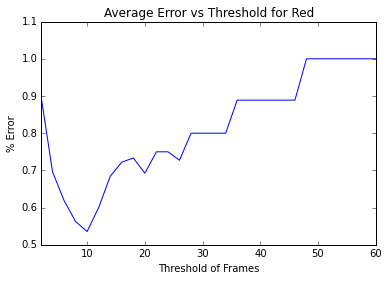

In [17]:
#videos 7 and 2 seem to be particularly problematic

two= pd.Series(allErrors[2][0], index=thresholds)

%matplotlib inline
r = two.plot(title="Average Error vs Threshold for Red")
r.set_xlabel("Threshold of Frames")
r.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print two.idxmin()

Threshold with minimum number of errors:
14


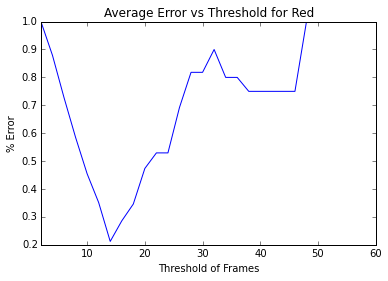

In [18]:
seven= pd.Series(allErrors[7][0], index=thresholds)

%matplotlib inline
r = seven.plot(title="Average Error vs Threshold for Red")
r.set_xlabel("Threshold of Frames")
r.set_ylabel("% Error")
print "Threshold with minimum number of errors:"
print seven.idxmin()

14
0.025641025641
14
0.0


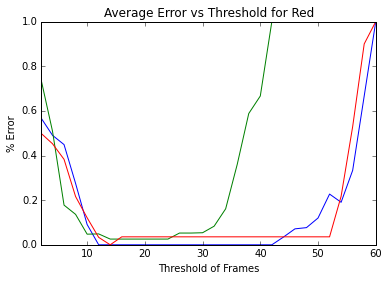

In [19]:
#compare with some of the better ones like 1,0 and 3, which are relatively much better than 2 and 7

one= pd.Series(allErrors[1][0], index=thresholds)
zero = pd.Series(allErrors[0][0], index=thresholds)
three = pd.Series(allErrors[3][0], index=thresholds)
r = one.plot(title="Average Error vs Threshold for Red")
r2 = zero.plot()
r3 = three.plot()
r.set_xlabel("Threshold of Frames")
r.set_ylabel("% Error")
print zero.idxmin()
print zero.min()
print three.idxmin()
print three.min()
#blue is 1, green is 3, red is 0

[16, 1, 1, 2, 0]


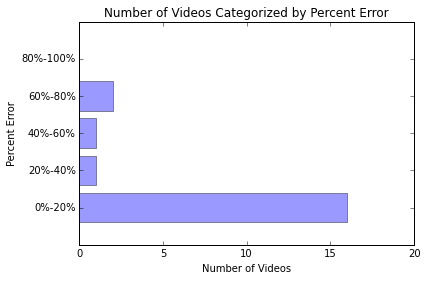

In [20]:
beams = ('0%-20%', '20%-40%', '40%-60%', '60%-80%','80%-100%')
y_pos = numpy.arange(len(beams))
qualList = [0,0,0,0,0]
for i in range(0,len(getQualityList(.2,videoList))):
    qualList[i]=len(getQualityList(.2,videoList)[i])
print qualList

plt.barh(y_pos,qualList,align='center', alpha=0.4)
plt.yticks(y_pos, beams)
plt.xlabel('Number of Videos')
plt.ylabel('Percent Error')
plt.xlim(0, len(videoList))
plt.title('Number of Videos Categorized by Percent Error')
plt.show()